In [1]:
using PyPlot
using VAE: trainVAE, DataLoader, next_batch, reconstruct, transform, generate, create_loss_optimizer
using TensorFlow

In [ ]:
## Fit model
network_architecture = Dict("n_hidden_recog_1" => 500, # 1st layer encoder neurons
         "n_hidden_recog_2"=>500, # 2nd layer encoder neurons
         "n_hidden_gener_1"=>500, # 1st layer decoder neurons
         "n_hidden_gener_2"=>500, # 2nd layer decoder neurons
         "n_input"=>784, # MNIST data input (img shape: 28*28)
         "n_z"=>20)  # dimensionality of latent space

sess, x, z, x_hat_μ, z_μ, z_log_σ2 = trainVAE(network_architecture, training_epochs=75)

In [ ]:
## compute Loss after fitting
Loss, = create_loss_optimizer(x,x_hat_μ,z_μ,z_log_σ2)
cur_loss, = run(sess, Loss, Dict(x => x_sample))

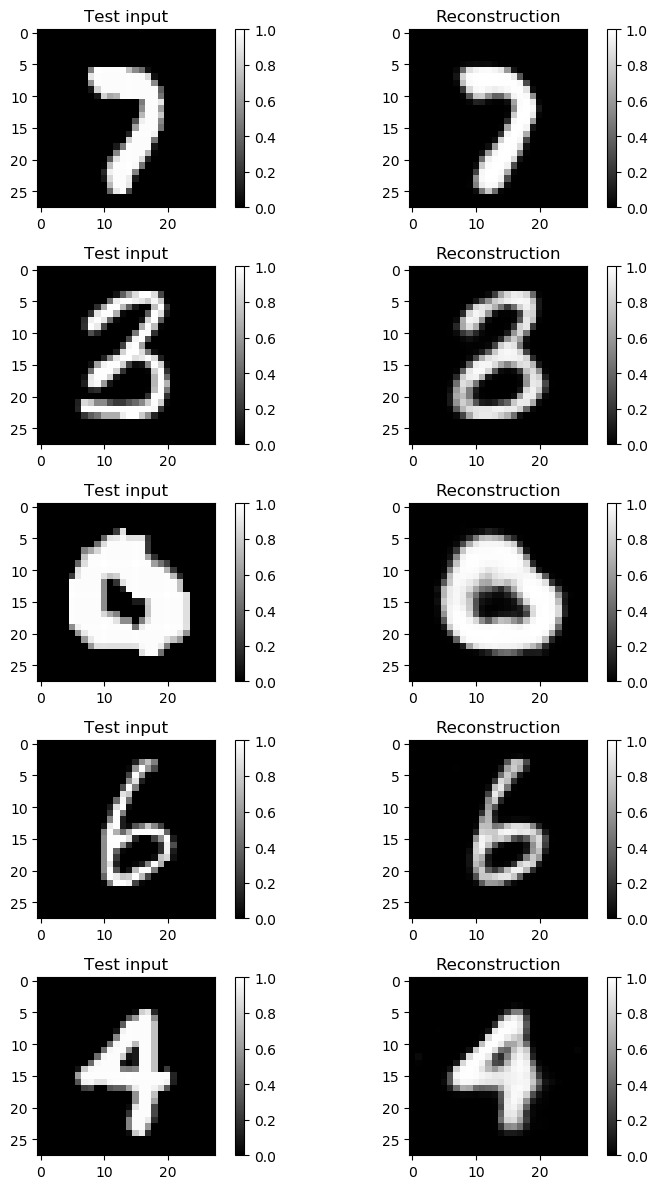

In [8]:
## plot some reconstructed samples
loader = DataLoader() 
x_sample = next_batch(loader, 100)[1]
x_sample = broadcast(/,x_sample,maximum(x_sample,2));
x_reconstruct = reconstruct(sess, x, x_hat_μ, x_sample)

figure(figsize=(8, 12))

for i in 1:5

    subplot(5, 2, 2*i-1)
    imshow(reshape(x_sample[i,:], 28, 28), vmin=0, vmax=1, cmap="gray")
    title("Test input")
    colorbar()
    subplot(5, 2, 2*i)
    imshow(reshape(x_reconstruct[i,:], 28, 28), vmin=0, vmax=1, cmap="gray")
    title("Reconstruction")
    colorbar()
end

tight_layout()

In [ ]:
## Look at latent space
network_architecture = Dict("n_hidden_recog_1" => 500, # 1st layer encoder neurons
         "n_hidden_recog_2"=>500, # 2nd layer encoder neurons
         "n_hidden_gener_1"=>500, # 1st layer decoder neurons
         "n_hidden_gener_2"=>500, # 2nd layer decoder neurons
         "n_input"=>784, # MNIST data input (img shape: 28*28)
         "n_z"=>2)  # dimensionality of latent space

sess, x, z, x_hat_μ, z_μ, z_log_σ2 = trainVAE(network_architecture, training_epochs=75)

2018-11-28 01:17:21.873746: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA


In [ ]:
## compute Loss after fitting
Loss, = create_loss_optimizer(x,x_hat_μ,z_μ,z_log_σ2)
cur_loss, = run(sess, Loss, Dict(x => x_sample))

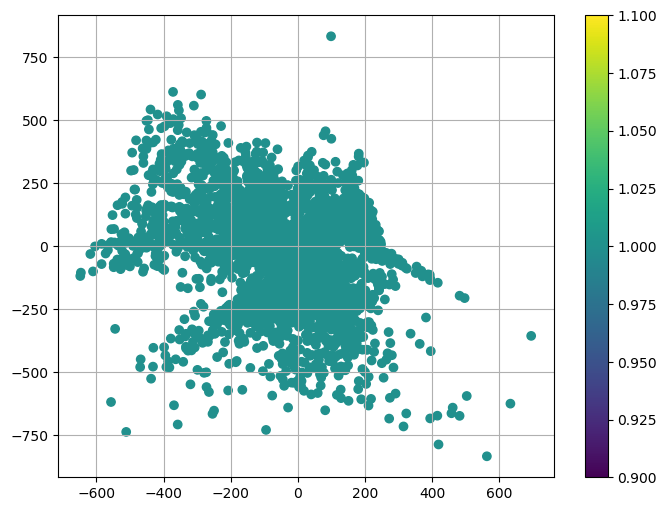

In [35]:
#probably incomplete, need to get color to be encoded value for each digit
x_sample, y_sample = next_batch(loader, 5000)
x_sample = broadcast(/,x_sample,maximum(x_sample,2));
z_mu = transform(sess, x, z_μ, x_sample)

figure(figsize=(8, 6)) 
scatter(z_mu[:, 1], z_mu[:, 2], c=vec(findmax(y_sample,2)[2]))
colorbar()
grid()

In [ ]:
#incomplete
nx = ny = 20
x_values = linspace(-3, 3, nx)
y_values = linspace(-3, 3, ny)

canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        z_mu = np.array([[xi, yi]]*vae.batch_size)
        x_mean = generate(z_mu)
        canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = x_mean[0].reshape(28, 28)

figure(figsize=(8, 10))        
Xi, Yi = np.meshgrid(x_values, y_values)
imshow(canvas, origin="upper", cmap="gray")
tight_layout()